<a href="https://colab.research.google.com/github/Ishank09/Word-Detection/blob/main/Word_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import numpy as np
import pandas as pd
import cv2

In [ ]:
#!rm -rf /content/sample_data/Images

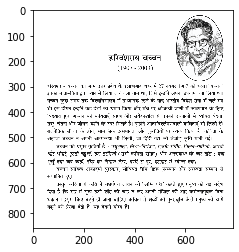

In [ ]:
# img = cv2.imread("/content/sample_data/KannadaBookfrontIMG.PNG")
# img = cv2.imread("/content/sample_data/EnglishBookFrontIMG.png")
from skimage.filters import threshold_local

fileName = "hindi1.png"
img = cv2.imread("/content/sample_data/" + fileName)

# alpha = 2.0
# beta = -160
# new = alpha * img + beta
# img = np.clip(new, 0, 255).astype(np.uint8)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
vis = gray.copy()
# gray = cv2.erode(gray, np.ones((1, 20)))
# gray = cv2.dilate(gray, np.ones((1, 22)))
T = threshold_local(gray, 11, offset = 10, method = "gaussian")
gray = (gray > T).astype("uint8") * 255

plt.imshow(img)
plt.show()




# plt.imshow(gray)
# plt.show()
# img = gray


In [ ]:

# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# # Remove horizontal
# horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
# detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
# cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     cv2.drawContours(gray, [c], -1, (255,255,255), 2)

# # Repair image
# repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
# gray = 255 - cv2.morphologyEx(255 - gray, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

# # cv2.imshow('thresh', thresh)
# # cv2.imshow('detected_lines', detected_lines)
# # cv2.imshow('result', result)
# # cv2.waitKey()

In [ ]:
# gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# linek = np.zeros((11,11),dtype=np.uint8)
# linek[5,...]=1
# x=cv2.morphologyEx(gray, cv2.MORPH_OPEN, linek ,iterations=1)
# gray-=x

In [ ]:

#mser = cv2.MSER_create( 	_min_area = 200,_max_area  = 7000)
#mser = cv2.MSER_create(1, 0, 94400, 0.05, 0.02, 200, 1.01, 0.003, 5)
mser = cv2.MSER_create(1, 0, 5000, 0.05, 0.02, 200, 1.01, 0.003, 5)
coordinates, bboxes =  mser.detectRegions(gray)
# print((bboxes))
bboxes = bboxes[bboxes[:,3]>3]
print(bboxes.size)


4112


In [ ]:
temp = bboxes
copy_1 = vis.copy()
copy_4 = vis.copy()

In [ ]:
intermediate_stage1 = vis.copy()
for bbox in temp:
    x1, y1, w, h = bbox
    cv2.rectangle(intermediate_stage1, (x1, y1), (x1+w, y1+h), (0, 255, 0), 2)
cv2.imwrite("/content/sample_data/intermediate_stage1/" + fileName , intermediate_stage1) 

True

In [ ]:
def nms(boxes, overlapThresh, choice):
    if len(boxes) == 0:
        return []

    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    pick = []

    x1 = []
    x2 = []
    y1 = []
    y2 = []
    if choice == 0 :
      # Take four coordinate arrays
      x1 = boxes[:, 0]
      y1 = boxes[:, 1]
      # x2 = boxes[:, 2]
      # y2 = boxes[:, 3]
      w = boxes[:, 2]
      h = boxes[:, 3]
      # x2 = x1 + w
      # y2 = y1 + h
      x2 = np.add(x1,w)
      y2 = np.add(y1,h)
      # Computational Area Array
    else : 
        x1 = boxes[:, 0]
        y1 = boxes[:, 1]
        x2 = boxes[:, 2]
        y2 = boxes[:, 3]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)

    # Sort by score (if there is no confidence score, it can be sorted by coordinates from small to large, such as lower right corner coordinates)
    idxs = np.argsort(y2)

    # Start traversing and delete duplicate boxes
    while len(idxs) > 0:
        # Put the bottom right box into the pick array
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # Find the maximum and minimum coordinates in the remaining frames
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # Calculate the proportion of overlapping area to the corresponding box, i.e. IoU
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / area[idxs[:last]]

        # If IoU is greater than the specified threshold, delete
        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))

    return boxes[pick].astype("int")

In [ ]:

temp = nms(bboxes,0.5,0)
print(temp.size)

1448


In [ ]:
intermediate_stage2 = vis.copy()
for bbox in temp:
    x1, y1, w, h = bbox
    cv2.rectangle(intermediate_stage2, (x1, y1), (x1+w,y1+h), (0, 255, 0), 2)
cv2.imwrite("/content/sample_data/intermediate_stage2/" + fileName , intermediate_stage2) 

True

In [ ]:
################################################################

In [ ]:
bboxes_list = list()
heights = list()
for bbox in temp:
    x, y, w, h = bbox
    bboxes_list.append([x, y, x + w, y + h])  # Create list of bounding boxes, with each bbox containing the left-top and right-bottom coordinates
    heights.append(h)
heights = sorted(heights)  # Sort heights
median_height = heights[int(len(heights) / 2)] / 2  # Find half of the median height

In [ ]:
def grouper(iterable, interval=2):
    prev = None
    group = []
    for item in iterable:
        if not prev or abs(item[1] - prev[1]) <= interval:
            group.append(item)
        else:
            yield group
            group = [item]
        prev = item
    if group:
        yield group

In [ ]:
import sys
bboxes_list = sorted(bboxes_list, key=lambda k: k[1])  # Sort the bounding boxes based on y1 coordinate ( y of the left-top coordinate )
print(bboxes_list)
combined_bboxes = grouper(bboxes_list, median_height)  # Group the bounding boxes
finalLineBox = []
for group in combined_bboxes:
    x_min = min(group, key=lambda k: k[0])[0]  # Find min of x1
    x_max = max(group, key=lambda k: k[2])[2]  # Find max of x2
    y_min = min(group, key=lambda k: k[1])[1]  # Find min of y1
    y_max = max(group, key=lambda k: k[3])[3]  # Find max of y2
    finalLineBox.append([x_min,y_min,x_max,y_max])
finalLineBox = merge_anchor_boxes(finalLineBox)
print(finalLineBox)
for group in finalLineBox:
  # print(group)
  x1,y1,x2,y2 = group
  cv2.rectangle(vis, (x1, y1), (x2, y2), (0, 255, 0), 2)

#     finalLineBox.append([x_min, y_min, x_max, y_max])
# finalLineBox = sorted(finalLineBox, key=lambda k: k[1])  # Sort the bounding boxes based on y1 coordinate ( y of the left-top coordinate )

# finalLineBox = np.asarray(finalLineBox)
# finalLineBox = nms(finalLineBox, 0.5,1)
# for bbox in finalLineBox:
#     x1, y1, x2, y2 = bbox
#     cv2.rectangle(vis, (x1, y1), (x2, y2), (0, 255, 0), 2)
  

[[562, 20, 748, 281], [296, 172, 419, 203], [430, 178, 505, 200], [333, 216, 341, 242], [464, 218, 471, 241], [380, 219, 391, 236], [355, 219, 366, 236], [438, 219, 449, 236], [450, 219, 460, 236], [426, 219, 436, 236], [345, 219, 352, 236], [368, 219, 378, 236], [413, 219, 423, 232], [291, 287, 327, 307], [479, 287, 483, 292], [54, 289, 128, 307], [744, 289, 748, 297], [689, 289, 693, 297], [504, 292, 513, 308], [600, 292, 609, 308], [572, 292, 577, 307], [679, 292, 682, 306], [616, 292, 638, 306], [473, 292, 486, 306], [333, 292, 352, 306], [494, 292, 502, 302], [357, 293, 428, 309], [590, 293, 599, 308], [580, 293, 589, 308], [520, 293, 563, 307], [252, 293, 285, 307], [433, 293, 467, 307], [656, 293, 677, 306], [696, 293, 741, 306], [134, 293, 180, 306], [185, 293, 208, 306], [213, 293, 246, 306], [644, 293, 657, 300], [450, 299, 458, 307], [647, 299, 655, 306], [306, 300, 313, 308], [494, 302, 503, 307], [647, 306, 657, 311], [493, 316, 535, 338], [318, 316, 383, 336], [254, 316, 

In [ ]:

cv2.imwrite("/content/sample_data/Trial/" + "TRIAL_" + fileName , vis) 

True

In [ ]:
################################################################

In [ ]:
###########################

In [ ]:

def merge_anchor_boxes(combined_bboxes):
  print(combined_bboxes)
  boxslists = []
  for group in combined_bboxes:
    x1, y1, x2, y2 = group
    group_1 = x1 , x2, y1, 1
    group_2 = x1, x2, y2, 0
    boxslists.append(group_1)
    boxslists.append(group_2)
  boxslists = sorted(boxslists, key=lambda k: k[2])  # Sort the bounding boxes based on y1 coordinate ( y of the left-top coordinate )
  # boxslists = numpy.insert(boxslists, 0, [0,0,0,0]) 
  count = 0 
  answer = []
  first = 1
  next = 0
  end = start = 0
  x_min = sys.maxsize
  x_max = -sys.maxsize - 1
  for box in boxslists:
    x1, x2, y, choice = box
    if (choice == 0):
      count = count - 1
      if (x2 > x_max):
        x_max = x2
    else:
      count = count + 1
      if (x1 < x_min):
        x_min = x1

    if (count == 0):
      #answer.append(x1,x2,y)
      end = y
      answer.append([x_min,start,x_max, end])
      # answer[0].append(x_min)
      # answer[1].append(y_min)
      # answer[2].append(x_max)
      # answer[3].append(y_max)

      x_min = sys.maxsize
      x_max = -sys.maxsize - 1
      next = 1
    
    elif(next == 1 or first == 1):
      next = 0
      first = 0
      #answer.append(x1,x2,y)
      start = y
  return answer


In [ ]:
#############################

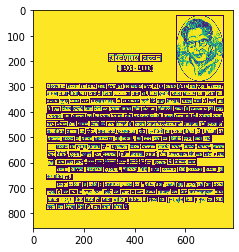

True

In [ ]:
count = 0
copy_1 = vis.copy()
for bbox in temp:
    count = count + 1
    x, y, w, h = bbox
    
    # plt.imshow(cv2.rectangle(vis, (x, y), (x + w, y + h), (0, 255, 0), 2))
    # plt.show()
    cv2.imwrite("/content/sample_data/Images/" + "letter" + str(count) + ".jpg", vis[y:y+h,x:x+w])
    # cv2.imwrite("/content/sample_data/Images/" + "letter" + str(count) + ".jpg" , cv2.rectangle(vis, (x, y), (x + w, y + h), (0, 255, 0), 2)) 
    cv2.rectangle(vis, (x, y), (x + w, y + h), (0, 255, 0), 2)


plt.imshow(vis)
plt.show()
# cv2.imwrite("/content/sample_data/KannadaBookFront.jpg", vis) 
# cv2.imwrite("/content/sample_data/EnglishBookFront.png.jpg", vis) 
cv2.imwrite("/content/sample_data/Trial/" + "BOX_" + fileName , vis) 

In [ ]:
!zip -r /content/sample_data.zip /content/sample_data

  adding: content/sample_data/ (stored 0%)
  adding: content/sample_data/hindi1.png (deflated 4%)
  adding: content/sample_data/kannad2.jpg (deflated 2%)
  adding: content/sample_data/kannad3.jpg (deflated 6%)
  adding: content/sample_data/kannad8.jpg (deflated 8%)
  adding: content/sample_data/kannad5.jpg (deflated 2%)
  adding: content/sample_data/english2.PNG (deflated 7%)
  adding: content/sample_data/kannad7.png (deflated 8%)
  adding: content/sample_data/kannad9_1.png (deflated 1%)
  adding: content/sample_data/kannad6.PNG (deflated 2%)
  adding: content/sample_data/kannad9.PNG (deflated 1%)
  adding: content/sample_data/kannad1.png (deflated 3%)
  adding: content/sample_data/.ipynb_checkpoints/ (stored 0%)
  adding: content/sample_data/english1.png (deflated 28%)
  adding: content/sample_data/Trial/ (stored 0%)
  adding: content/sample_data/Trial/TRIAL_kannad7.png (deflated 18%)
  adding: content/sample_data/Trial/TRIAL_english2.PNG (deflated 26%)
  adding: content/sample_data/T

In [ ]:
# from google.colab import files
# files.download("/content/sample_data/Images.zip")

In [ ]:

regions, _ = mser.detectRegions(copy_1)

In [ ]:
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

In [ ]:
# cv2.polylines(vis, hulls, 1, (0, 255, 0))

# plt.imshow(vis)
# plt.show()
# cv2.imwrite("/content/sample_data/geeks3.jpg", vis) 

In [ ]:
mask = np.zeros((copy_1.shape[0], copy_1.shape[1], 1), dtype=np.uint8)

for contour in hulls:

    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)


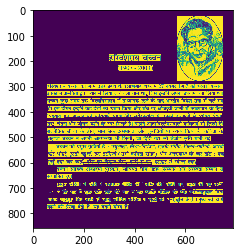

In [ ]:
text_only = cv2.bitwise_and(copy_1, copy_1, mask=mask)
cv2.imwrite("/content/sample_data/Trial/"+ "TEXT_" + fileName , text_only) 
plt.imshow(text_only)
plt.show()

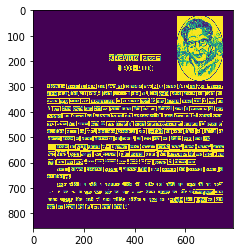

True

In [ ]:
count = 0
for bbox in temp:
    count = count + 1
    x, y, w, h = bbox
    
    # plt.imshow(cv2.rectangle(vis, (x, y), (x + w, y + h), (0, 255, 0), 2))
    # plt.show()
    #cv2.imwrite("/content/sample_data/Images/" + "letter" + str(count) + ".jpg", text_only[y:y+h,x:x+w])
    # cv2.imwrite("/content/sample_data/Images/" + "letter" + str(count) + ".jpg" , cv2.rectangle(vis, (x, y), (x + w, y + h), (0, 255, 0), 2)) 
    cv2.rectangle(text_only, (x, y), (x + w, y + h), (0, 255, 0), 2)


plt.imshow(text_only)
plt.show()
# cv2.imwrite("/content/sample_data/KannadaBookFront.jpg", vis) 
# cv2.imwrite("/content/sample_data/EnglishBookFront.png.jpg", vis) 
cv2.imwrite("/content/sample_data/Trial" + "ALL_" + fileName , text_only) 